In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [24]:
# create state for the graph

class State(TypedDict):
    name: str
    age: str
    skills: List[str]
    final: str

# create node actions

def add_name(state:State)->State:
    state['final'] = f'Hi {state["name"]}! '
    return state

def add_age(state:State)->State:
    state['final'] += f'You are {state["age"]} years old. '
    return state

def add_skills(state:State)->State:

    state['final'] += f'You are good at {state["skills"][0]}'
    for i in range(1,len(state['skills'])):
        if i == len(state['skills'])-1:
            state['final'] += f' and {state["skills"][i]}'
            break
        state['final'] += f', {state["skills"][i]}'
    return state

In [25]:
### create graph and nodes

graph = StateGraph(State)

graph.add_node("add_name",add_name)
graph.add_node("add_age", add_age)
graph.add_node("add_skills", add_skills)

### create edges

graph.add_edge("add_name","add_age")
graph.add_edge("add_age","add_skills")

### set start and end point

graph.set_entry_point("add_name")
graph.set_finish_point("add_skills")

### compile graph

app = graph.compile()

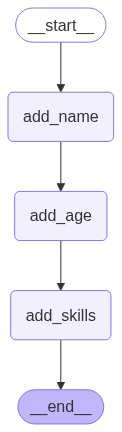

In [26]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result = app.invoke({"name": "Ahmed", "age": "23", "skills":["Python","ML","MLOPS","Langgraph"]})
result['final']

'Hi Ahmed! You are 23 years old. You are good at Python, ML, MLOPS and Langgraph'